In [1]:
%pylab inline

import numpy
import pylab
import plot_surf_stat_map_3 as plot_surf
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Open mesh in ply format
def open_ply(filepath):
    f=open(filepath,'r');
    i=0;
    ip=0;
    it=0;
    np=0;
    nt=0;
    for str in f:
        i+=1;
        arr=str.split(" ");
        if(arr[0]=="element" and arr[1]=="vertex"):
            np=int(arr[2]);
            p=numpy.zeros((np,3));
        elif(arr[0]=="element" and arr[1]=="face"):
            nt=int(arr[2]);
            t=numpy.zeros((nt,3));
        elif(i>=11 and i<11+np):
            p[ip,0]=float(arr[0]);
            p[ip,1]=float(arr[1]);
            p[ip,2]=float(arr[2]);
            ip+=1;
        elif(i>=11+np and i<11+np+nt):
            t[it,0]=int(arr[1]);
            t[it,1]=int(arr[2]);
            t[it,2]=int(arr[3]);
            it+=1;
    mesh={};
    mesh["np"]=np;
    mesh["nt"]=nt;
    mesh["p"]=p;
    mesh["t"]=t;
    return mesh;

In [8]:
# Normal of triangle a,b,c
def normal(a,b,c):
    v=numpy.cross(b-a,c-a)
    n=v/numpy.linalg.norm(v)
    return n;

# Compute the normals for each vertex in mesh
def normals(mesh):
    np=mesh["np"];
    nt=mesh["nt"];
    p=mesh["p"];
    t=mesh["t"];
    n=numpy.zeros((np,3));
    for i in range(0,nt):
        nn=normal(p[t[i,0]],p[t[i,1]],p[t[i,2]]);
        n[t[i,0]]=numpy.add(n[t[i,0]],nn);
        n[t[i,1]]=numpy.add(n[t[i,1]],nn);
        n[t[i,2]]=numpy.add(n[t[i,2]],nn);
    for i in range(0,np):
        n[i]=n[i]/numpy.linalg.norm(n[i]);
    return n;

In [9]:
def computeSulc(mesh,vect):
    n = []
    n = normals(mesh)
    # vector point of view for shades // ex: [1,0,0] light from the front of the brain (X orientation)
    # if dot(a,b)=0 then a and b orthogonals
    sulc = dot(n, vect)
    return sulc

In [4]:
path = '/Users/ghfc/Desktop/'
fmesh = path+'P32-F16_as_F01_402.ply'
mesh = open_ply(fmesh)
np=mesh["np"];
nt=mesh["nt"];
p=mesh["p"];
t=mesh["t"];

In [12]:
data_ = ones(np)
sulc = computeSulc(mesh,[1,0,0])

/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/ghfc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [16]:
flabels = path+'labelsClusters40.txt'
labels = loadtxt(flabels)

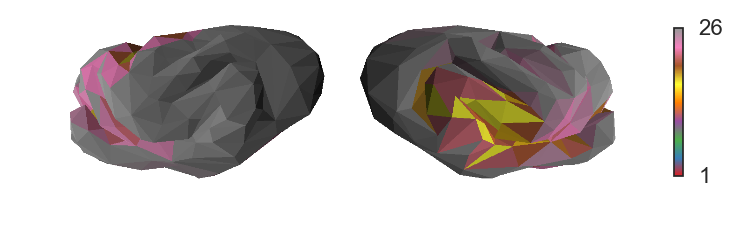

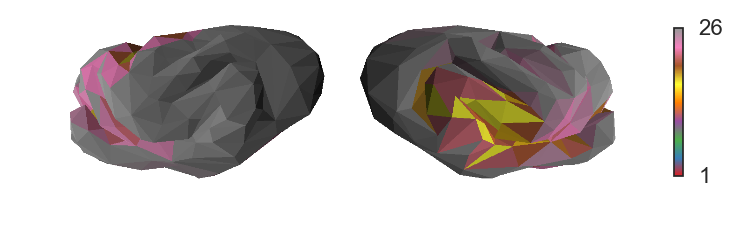

In [25]:
sns.set_context('poster')
sns.set_style("white")

plot_surf.create_fig( data=labels[1:len(labels)], coords=p, faces=t, azims=[0, 180], elevs=[180, 180], sulc=sulc, cmap='Set1', cbar=True)
#plt.savefig(path+'P16_F21_sulc_fig.png')